# Problem Solving Agents: Uninformed Search

## Problem-Solving Agents & State Space

When the correct action to take is not immediately obvious, an agent may need to to plan ahead: to consider a sequence of actions that form a path to a goal state.

Such an agent is called a **problem-solving agent**, and the computational process it undertakes is called **search**.

Problem-solving agents use atomic representations - states of the world are considered as wholes, with no internal structure visible to the problem-solving algorithms

We are going to build the **goal-based agents** that can plan ahead to solve problems.\\\\



       

### Romania navigation problem Example

In particular, we examine n*avigation problem/ route finding problem*.

We consider only the simplest environments: single agent, fully observable, deterministic, static, discrete, and known

1. We must begin by **precisely defining problems** -> `class Problem` - how we define a Problem in general 

 **!!!** Explore the `class Problem`

2. `class Problem` == The *abstract class* for a formal problem. 
* You should subclass     this and implement the methods `actions` and `result`, and possibly  ` __init__, goal_test`, and `path_cost`. 
* The *state space* should be included in a subclass
* Then you will create instances of your subclass and solve them with the various search functions.

3. `class  GraphProblem(Problem)` == The problem of searching a graph (the state space  ==  a graph) from one node to another
* The state space is stored as nested dictionaries

    `G={'node1':{'neighbor1_of_Node1':distance_from_Node1_to_neighbor1_of_Node1,..},
       .....}`

In [4]:
from src.graphProblemClass import GraphProblem

The graph data -> stored in the nested dictionary `romaniaData`

In [5]:
from data.RomaniaMapData import romaniaData

In [6]:
romaniaData

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99},
 'Hirsova': {'Urziceni': 98},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu': 97},
 'Rimnicu': {'Sibiu': 80},
 'Urziceni': {'Vaslui': 142}}

4. Based on this dictionary we need to build a graph
* !!! Check the `Graph class`

A graph connects nodes (vertices) by edges (links). Each edge can also have a length associated with it. 

* The constructor call is something like:

        `g = Graph({'A': {'B': 1, 'C': 2})`

this makes a graph with 3 nodes, A, B, and C, with an edge of length 1 from     A to B,  and an edge of length 2 from A to C. 
    
This makes an `undirected graph`, so inverse links are also added. 

If you add more links with `g.connect('B', 'C', 3)`, then inverse link is also added. 
* You can use `g.nodes()` to get a list of nodes,
* `g.get('A')` to get a dict of links out of A, 
* and `g.get('A', 'B')` to get the length of the link from A to B.

In [7]:
from src.graphClass import Graph

In [8]:
romaniaGraph = Graph(romaniaData)

In [9]:
romaniaGraph.nodes()

['Drobeta',
 'Arad',
 'Pitesti',
 'Sibiu',
 'Iasi',
 'Bucharest',
 'Fagaras',
 'Eforie',
 'Neamt',
 'Rimnicu',
 'Giurgiu',
 'Mehadia',
 'Urziceni',
 'Zerind',
 'Vaslui',
 'Timisoara',
 'Hirsova',
 'Lugoj',
 'Craiova',
 'Oradea']

In [10]:
romaniaGraph.get('Arad')

{'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118}

In [11]:
romaniaGraph.get('Arad','Zerind')

75

Let's try to show the graph

In [12]:
from pyvis.network import Network 

In [13]:
net = Network( heading="Lab3. Examples of Romania Navigation Problem",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%"
) # do this

In [14]:
net.add_nodes(romaniaGraph.nodes(), title=[str(node) for node in romaniaGraph.nodes()])

In [15]:
nodeColors={
    "start":"red",
    "goal": "green",
    "frontier": "orange",
    "expanded":"pink"
}

In [16]:
for node in net.nodes:
    if node['id']=='Arad':
        node["color"]=nodeColors["start"]
    elif node['id']=='Bucharest':
        node["color"]=nodeColors["goal"]
    

In [38]:
romaniaGraph.graph_dict

{'Arad': {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
 'Bucharest': {'Urziceni': 85, 'Pitesti': 101, 'Giurgiu': 90, 'Fagaras': 211},
 'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75, 'Craiova': 120},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
 'Hirsova': {'Urziceni': 98, 'Eforie': 86},
 'Iasi': {'Vaslui': 92, 'Neamt': 87},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu': 97, 'Bucharest': 101, 'Craiova': 138},
 'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
 'Urziceni': {'Vaslui': 142, 'Bucharest': 85, 'Hirsova': 98},
 'Zerind': {'Arad': 75, 'Oradea': 71},
 'Sibiu': {'Arad': 140, 'Fagaras': 99, 'Oradea': 151, 'Rimnicu': 80},
 'Timisoara': {'Arad': 118, 'Lugoj': 111},
 'Giurgiu': {'Bucharest': 90},
 'Mehadia': {'Drobeta': 75, 'Lugoj': 70},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Neamt': {'Iasi': 87}}

In [17]:
edges=[]
edges_labels=[]

for node_source in romaniaGraph.nodes():
    for node_target, dist in romaniaGraph.get(node_source).items():
        if set((node_source,node_target)) not in edges:
            net.add_edge(node_source,node_target, label=str(dist))
            edges.append(set((node_source,node_target)))
            edges_labels.append(str(dist))
            
    
    

In [18]:
edges_labels[:5]

['75', '120', '75', '140', '118']

In [19]:
edges[:5]

[{'Drobeta', 'Mehadia'},
 {'Craiova', 'Drobeta'},
 {'Arad', 'Zerind'},
 {'Arad', 'Sibiu'},
 {'Arad', 'Timisoara'}]

In [20]:
net.edges

[{'label': '75', 'from': 'Drobeta', 'to': 'Mehadia'},
 {'label': '120', 'from': 'Drobeta', 'to': 'Craiova'},
 {'label': '75', 'from': 'Arad', 'to': 'Zerind'},
 {'label': '140', 'from': 'Arad', 'to': 'Sibiu'},
 {'label': '118', 'from': 'Arad', 'to': 'Timisoara'},
 {'label': '97', 'from': 'Pitesti', 'to': 'Rimnicu'},
 {'label': '101', 'from': 'Pitesti', 'to': 'Bucharest'},
 {'label': '138', 'from': 'Pitesti', 'to': 'Craiova'},
 {'label': '99', 'from': 'Sibiu', 'to': 'Fagaras'},
 {'label': '151', 'from': 'Sibiu', 'to': 'Oradea'},
 {'label': '80', 'from': 'Sibiu', 'to': 'Rimnicu'},
 {'label': '92', 'from': 'Iasi', 'to': 'Vaslui'},
 {'label': '87', 'from': 'Iasi', 'to': 'Neamt'},
 {'label': '85', 'from': 'Bucharest', 'to': 'Urziceni'},
 {'label': '90', 'from': 'Bucharest', 'to': 'Giurgiu'},
 {'label': '211', 'from': 'Bucharest', 'to': 'Fagaras'},
 {'label': '86', 'from': 'Eforie', 'to': 'Hirsova'},
 {'label': '146', 'from': 'Rimnicu', 'to': 'Craiova'},
 {'label': '70', 'from': 'Mehadia', 't

In [21]:
net.show("graph1.html", notebook=False)

graph1.html


### The vacumm world example

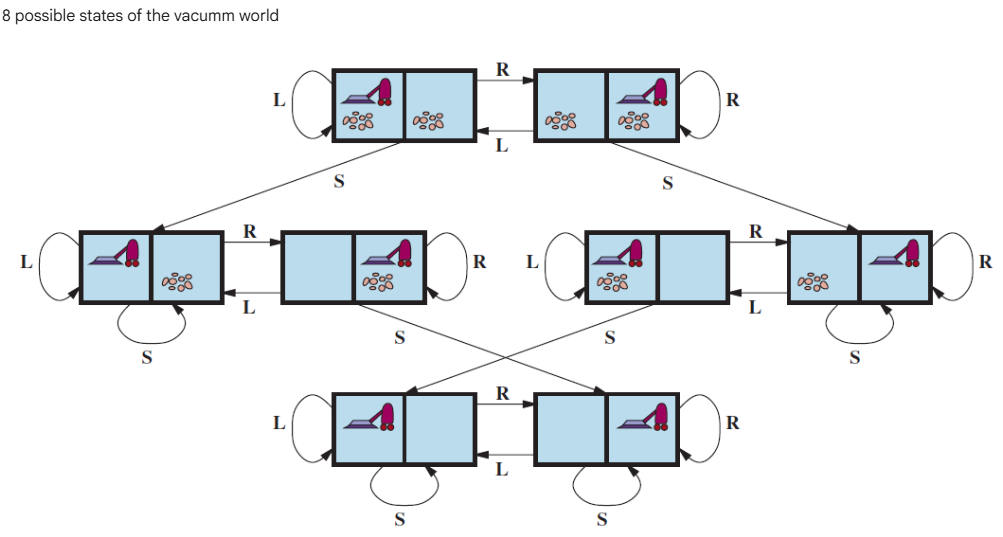

Each state is represented as:

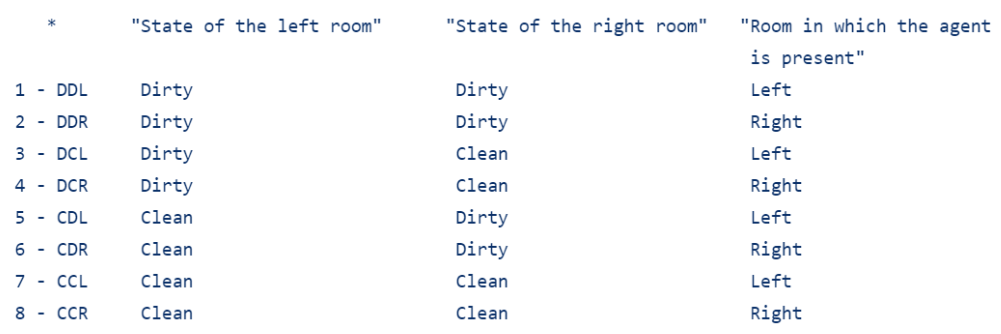

In [113]:
from data.vacuumWorldData import vacuumWorldDict

In [114]:
vacuumWorldDict

{'DDL': {'DDL': 'Left', 'DDR': 'Right', 'CDL': 'Suck'},
 'DDR': {'DDL': 'Left', 'DDR': 'Right', 'DCL': 'Suck'},
 'DCL': {'DCL': 'Left', 'DCR': 'Right', 'CCL': 'Suck'},
 'DCR': {'DCL': 'Left', 'DCR': 'Suck'},
 'CDL': {'CDL': 'Suck', 'CDR': 'Right'},
 'CDR': {'CDL': 'Left', 'CDR': 'Right', 'CCR': 'Suck'},
 'CCL': {'CCL': 'Suck', 'CCR': 'Right'},
 'CCR': {'CCL': 'Left', 'CCR': 'Suck'}}

In [2]:
from data.vacuumWorldData import vacuumWorld

In [37]:
vacuumWorld # the state space description

{'DDL': {'Suck': 'CDL', 'Left': 'DDL', 'Right': 'DDR'},
 'DDR': {'Suck': 'DCR', 'Left': 'DDL', 'Right': 'DDR'},
 'DCL': {'Suck': 'CCL', 'Left': 'DCL', 'Right': 'DCR'},
 'DCR': {'Suck': 'DCR', 'Left': 'DCL', 'Right': 'DCR'},
 'CDL': {'Suck': 'CDL', 'Left': 'CDL', 'Right': 'CDR'},
 'CDR': {'Suck': 'CCR', 'Left': 'CDL', 'Right': 'CDR'},
 'CCL': {'Suck': 'CCL', 'Left': 'CCL', 'Right': 'CCR'},
 'CCR': {'Suck': 'CCR', 'Left': 'CCL', 'Right': 'CCR'}}

In [42]:
from src.vacuumGraphClass import vacuumGraph

In [43]:
from data.vacuumWorldData import vacuumStatesLocations

In [44]:
vacuumWorldGraph = vacuumGraph(vacuumWorld, vacuumStatesLocations())

In [45]:
vacuumWorldGraph.graph_dict

{'DDL': {'CDL': 1, 'DDL': 1, 'DDR': 1},
 'DDR': {'DCR': 1, 'DDL': 1, 'DDR': 1},
 'DCL': {'CCL': 1, 'DCL': 1, 'DCR': 1},
 'DCR': {'DCR': 1, 'DCL': 1},
 'CDL': {'CDL': 1, 'CDR': 1},
 'CDR': {'CCR': 1, 'CDL': 1, 'CDR': 1},
 'CCL': {'CCL': 1, 'CCR': 1},
 'CCR': {'CCR': 1, 'CCL': 1}}

In [46]:
vacuumWorldGraph.get(("CDR"))

{'CCR': 1, 'CDL': 1, 'CDR': 1}

In [47]:
vacuumWorldGraph.getLocation(("CDR"))

(5, 9)

In [48]:
net_VacuumWorld = Network( heading="Lab3. Examples of Vacuum World Problem",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
                directed = True, 
) # do this

In [49]:
vacuumWorldGraph.nodes()

['CDR', 'DCL', 'CDL', 'CCL', 'DDR', 'DCR', 'DDL', 'CCR']

In [50]:
#net_VacuumWorld.add_nodes(vacuumWorldGraph.nodes())

for node in vacuumWorldGraph.nodes():
    x,y=vacuumWorldGraph.getLocation(node)
    net_VacuumWorld.add_node(node, x=x, y=y)

In [51]:
vacuumWorldGraph.get(("CDR"))

{'CCR': 1, 'CDL': 1, 'CDR': 1}

In [52]:
edges=[]
for node_source in vacuumWorldGraph.nodes():
    for node_target, actCost in vacuumWorldGraph.get(node_source).items():
        #action=vacuumWorld[node_source]
        #print(action)
        if (node_source,node_target) not in edges and (node_target, node_source):
            #net_VacuumWorld.add_edge(node_source,node_target, label=str(action))
            net_VacuumWorld.add_edge(node_source,node_target)
            edges.append((node_source,node_target))

In [99]:
edges

[('C,D,L', 'C,D,L'),
 ('C,D,L', 'C,D,R'),
 ('C,D,L', 'D,D,L'),
 ('D,D,R', 'D,D,L'),
 ('D,D,R', 'D,D,R'),
 ('D,D,R', 'D,C,L'),
 ('D,C,R', 'D,C,L'),
 ('D,C,R', 'D,C,R'),
 ('C,C,R', 'C,C,L'),
 ('C,C,R', 'C,C,R'),
 ('C,C,R', 'C,D,R'),
 ('D,D,L', 'D,D,L'),
 ('D,D,L', 'D,D,R'),
 ('D,D,L', 'C,D,L'),
 ('C,D,R', 'C,D,L'),
 ('C,D,R', 'C,D,R'),
 ('C,D,R', 'C,C,R'),
 ('D,C,L', 'D,C,L'),
 ('D,C,L', 'D,C,R'),
 ('D,C,L', 'C,C,L'),
 ('D,C,L', 'D,D,R'),
 ('C,C,L', 'C,C,L'),
 ('C,C,L', 'C,C,R'),
 ('C,C,L', 'D,C,L')]

In [53]:
net_VacuumWorld.show("graph2.html", notebook=False)

graph2.html
